# Matplotlib

<img src="images/matplotlib.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="25%">

Matplotlib is a multiplatform data visualization library built on NumPy arrays and designed to work with the broader SciPy stack. Initially released in 2003.

It received an early boost when it was adopted as the plotting package of choice of the Space Telescope Science Institute (people behind the Hubble Telescope), which financially supported Matplotlib’s development and greatly expanded its capabilities.

One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends.
Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you desire.
This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib.
It has led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

In recent years, however, the interface and style of Matplotlib have begun to show their age.
Newer tools like `ggplot` and `ggvis` in the R language, along with web visualization toolkits based on D3js and HTML5 canvas, often make Matplotlib feel clunky and old-fashioned.
Recent Matplotlib versions make it relatively easy to set new global plotting styles, and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, Seaborn (later today), and even Pandas itself can be used as wrappers around Matplotlib's API.
Even with wrappers like these, it is still often useful to dive into Matplotlib's syntax to adjust the final plot output.

## Installation

In [1]:
%%capture
%pip install matplotlib pandas scikit-learn
# pandas and sklearn are not direct dependencies, they are used to generate data for demo

Before we dive into the details of creating visualizations with Matplotlib, there are a few useful things you should know about using the package.

## Matplotlib conventions

Just as we use the `np` shorthand for NumPy and the `pd` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

The `plt` interface is what we will use most often.

## Setting Styles

We will use the `plt.style` directive to choose appropriate aesthetic styles for our figures.
Here we will set the `classic` style, which ensures that the plots we create use the classic Matplotlib style:

In [3]:
plt.style.use('classic')

## Displaying plots

A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context.
The best use of Matplotlib differs depending on how you are using it; roughly, the three applicable contexts are using Matplotlib in a script, in an IPython terminal, or in a Jupyter notebook.

### Plotting from a Script

If you are using Matplotlib from within a script, the function `plt.show` is your friend.
`plt.show` starts an event loop, looks for all currently active `Figure` objects, and opens one or more interactive windows that display your figure or figures.

So, for example, you may have a file called *myplot.py* containing the following:

```python
# file: myplot.py 
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

You can then run this script from the command-line prompt, which will result in a window opening with your figure displayed:

```
$ python myplot.py
```

The `plt.show` command does a lot under the hood, as it must interact with your system's interactive graphical backend.
The details of this operation can vary greatly from system to system and even installation to installation, but Matplotlib does its best to hide all these details from you.

One thing to be aware of: the `plt.show` command should be used *only once* per Python session, and is most often seen at the very end of the script.
Multiple `show` commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.

### Plotting from an IPython Shell

Matplotlib also works seamlessly within an IPython shell.
IPython is built to work well with Matplotlib if you specify Matplotlib mode.
To enable this mode, you can use the `%matplotlib` magic command after starting `ipython`:

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

At this point, any `plt` plot command will cause a figure window to open, and further commands can be run to update the plot.
Some changes (such as modifying properties of lines that are already drawn) will not draw automatically: to force an update, use `plt.draw`.
Using `plt.show` in IPython's Matplotlib mode is not required.

### Plotting from a Jupyter Notebook

Plotting interactively within a Jupyter notebook can be done with the `%matplotlib` command, and works in a similar way to the IPython shell.
You also have the option of embedding graphics directly in the notebook, with two possible options:

- `%matplotlib inline` will lead to *static* images of your plot embedded in the notebook.
- `%matplotlib notebook` will lead to *interactive* plots embedded within the notebook.

We will generally stick with the default, with figures rendered as static images:

In [4]:
%matplotlib inline

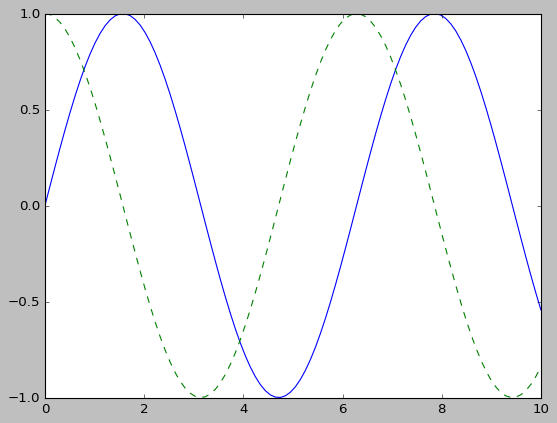

In [5]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

## Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the `savefig` command.
For example, to save the previous figure as a PNG file, we can run this:

In [6]:
fig.savefig('my_figure.png')

In [7]:
%ls -lh my_figure.png

-rw-r--r--@ 1 dima  staff    38K Oct  1 10:47 my_figure.png


To confirm that it contains what we think it contains, let's use the IPython `Image` object to display the contents of this file:

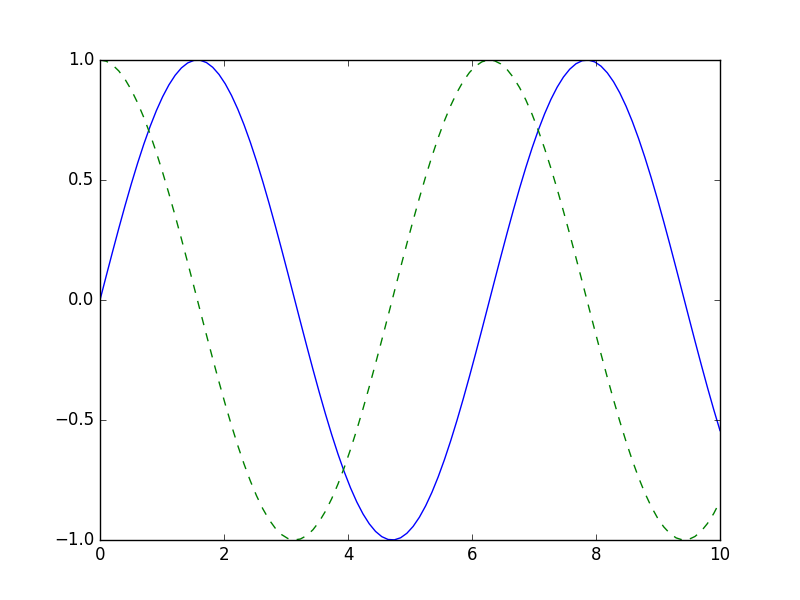

In [8]:
from IPython.display import Image
Image('my_figure.png')

In `savefig`, the file format is inferred from the extension of the given filename.
Depending on what backends you have installed, many different file formats are available.
The list of supported file types can be found for your system by using the following method of the figure canvas object:

In [9]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

> Note: when saving your figure, it is not necessary to use `plt.show` or related commands discussed earlier.

## Two Interfaces of Matplotlib

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. Let's see the differences between the two here.

### MATLAB-style Interface

Matplotlib was originally conceived as a Python alternative for MATLAB users, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the `pyplot` (`plt`) interface.
For example, the following code will probably look quite familiar to MATLAB users:

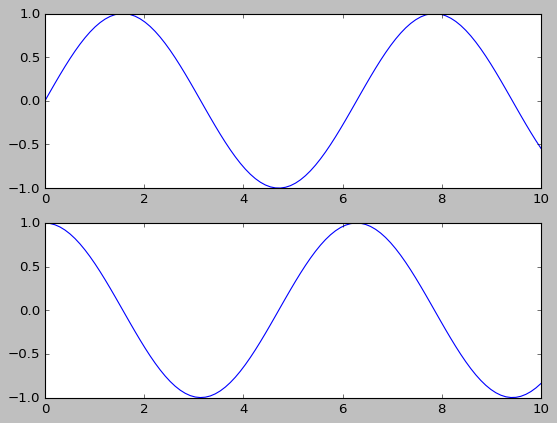

In [10]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

It is important to recognize that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all `plt` commands are applied.
You can get a reference to these using the `plt.gcf` (get current figure) and `plt.gca` (get current axes) methods.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems.
For example, once the second panel is created, how can we go back and add something to the first?
This is possible within the MATLAB-style interface, but a bit clunky.
Fortunately, there is a better way.

### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure.
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit `Figure` and `Axes` objects.
To re-create the previous plot using this style of plotting, you might do the following:

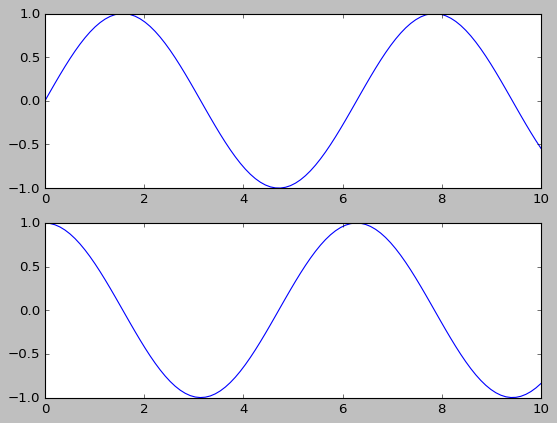

In [11]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

For simpler plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated.
In most cases, the difference is as small as switching `plt.plot` to `ax.plot`.

## Simple Line Plots
Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.

For all Matplotlib plots, we start by creating a figure and axes.
In their simplest form, this can be done as follows:

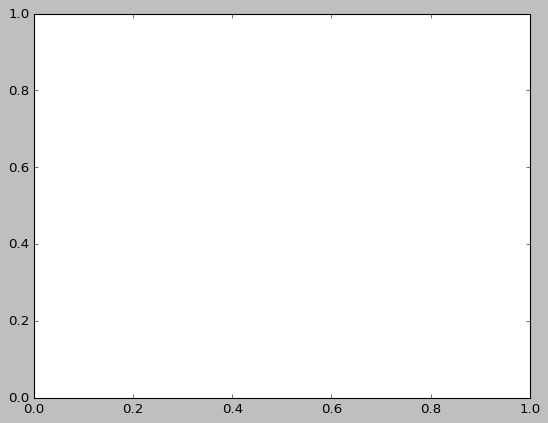

In [12]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the *figure* (an instance of the class `plt.Figure`) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.
The *axes* (an instance of the class `plt.Axes`) is what we see above: a bounding box with ticks, grids, and labels, which will eventually contain the plot elements that make up our visualization.
Throughout this part of notebook we will use the variable name `fig` to refer to a figure instance and `ax` to refer to an axes instance or group of axes instances.

Once we have created an axes, we can use the `ax.plot` method to plot some data. Let's start with a simple sinusoid:

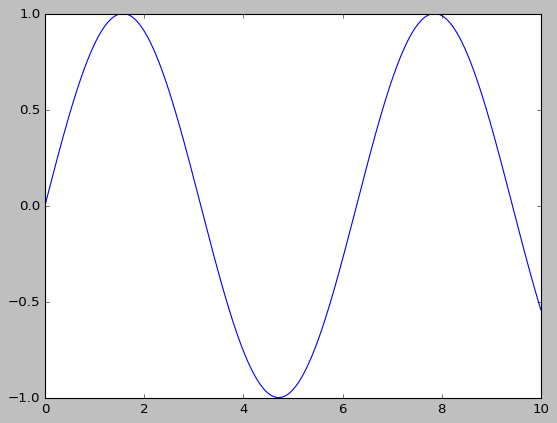

In [13]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

Note that the semicolon at the end of the last line is intentional: it suppresses the textual representation of the plot from the output.

Alternatively, we can use the PyLab interface and let the figure and axes be created for us in the background and the result is the same:

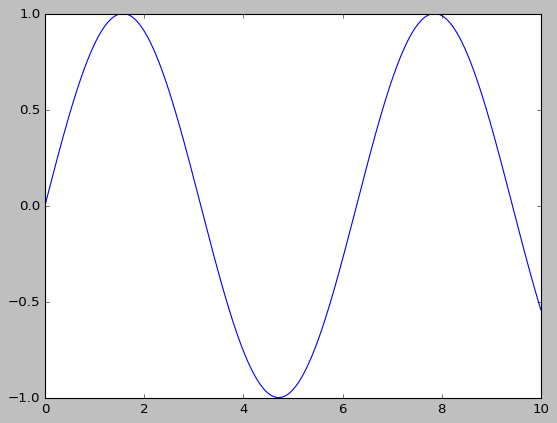

In [14]:
plt.plot(x, np.sin(x));

If we want to create a single figure with multiple lines, we can simply call the `plot` function multiple times:

In [15]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

That's all there is to plotting simple functions in Matplotlib!
We'll now dive into some more details about how to control the appearance of the axes and lines.

## Customizing the Plot
The first adjustment you might wish to make to a plot is to control the line colors and styles.
The `plt.plot` function takes additional arguments that can be used to specify these.
To adjust the color, you can use the `color` keyword, which accepts a string argument representing virtually any imaginable color.
The color can be specified in a variety of ways:

In [16]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # hex code (RRGGBB, 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # HTML color names supported

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

Similarly, the line style can be adjusted using the `linestyle` keyword:

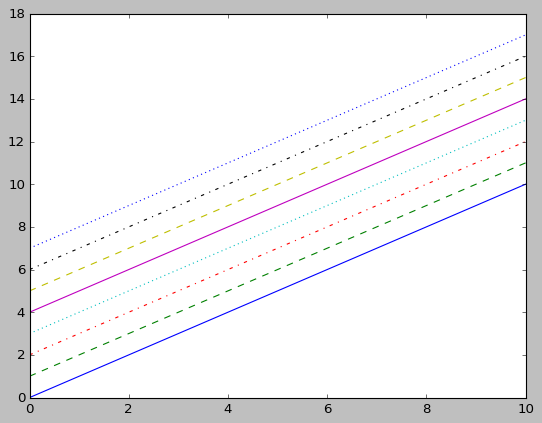

In [17]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

Though it may be less clear to someone reading your code, you can save some keystrokes by combining these `linestyle` and `color` codes into a single non-keyword argument to the `plt.plot` function:

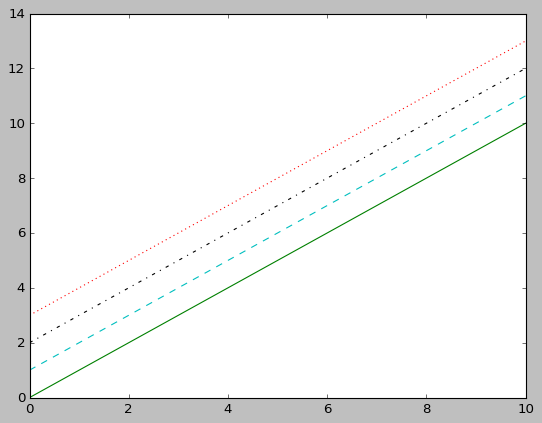

In [18]:
plt.plot(x, x + 0, '-g')   # solid green
plt.plot(x, x + 1, '--c')  # dashed cyan
plt.plot(x, x + 2, '-.k')  # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

These single-character color codes reflect the standard abbreviations in the RGB (Red/Green/Blue) and CMYK (Cyan/Magenta/Yellow/blacK) color systems, commonly used for digital color graphics.

There are many other keyword arguments that can be used to fine-tune the appearance of the plot; for details, read through the docstring of the `plt.plot` function using IPython's help tools.

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust the limits is to use the `plt.xlim` and `plt.ylim` functions:

In [19]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

If for some reason you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments:

In [20]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

A useful related method is `plt.axis` (note here the potential confusion between *axes* with an *e*, and *axis* with an *i*), which allows more qualitative specifications of axis limits. For example, you can automatically tighten the bounds around the current content:

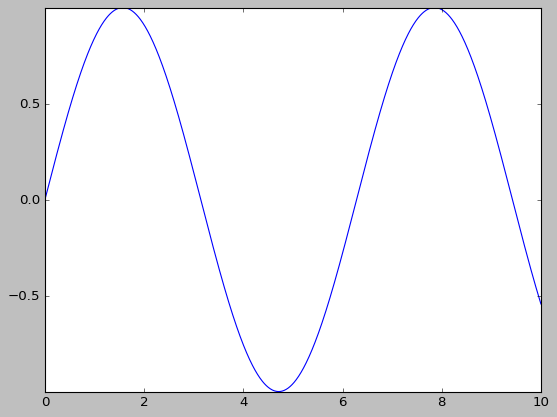

In [21]:
plt.plot(x, np.sin(x))
plt.axis('tight');

Or you can specify that you want an equal axis ratio, such that one unit in `x` is visually equivalent to one unit in `y`:

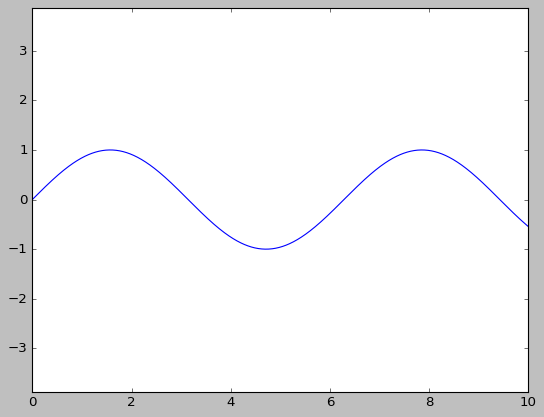

In [22]:
plt.plot(x, np.sin(x))
plt.axis('equal');

Other axis options include `'on'`, `'off'`, `'square'`, `'image'`, and more. For more information on these, refer to the `plt.axis` docstring.

Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them:

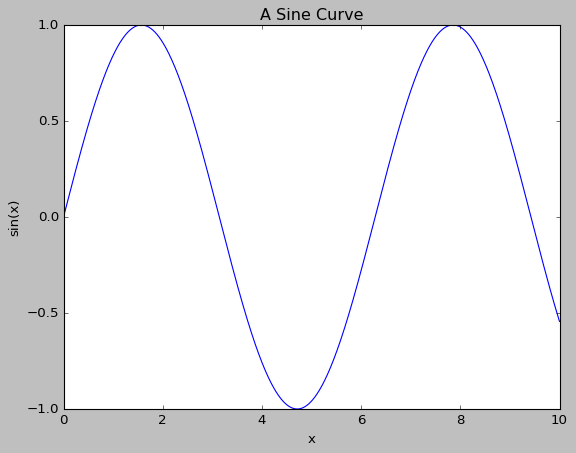

In [23]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

The position, size, and style of these labels can be adjusted using optional arguments to the functions, described in the docstrings.

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type.
Again, Matplotlib has a built-in way of quickly creating such a legend; it is done via the (you guessed it) `plt.legend` method.
Though there are several valid ways of using this, the easiest is to specify the label of each line using the `label` keyword of the `plot` function:

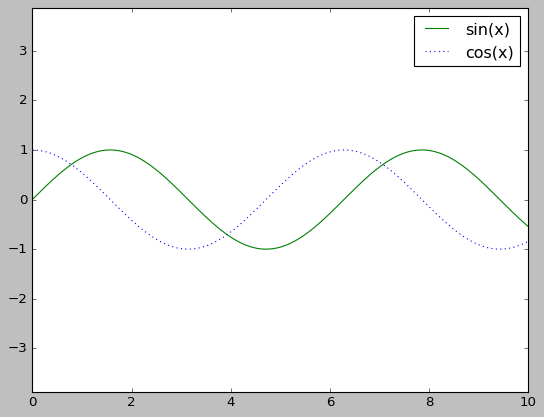

In [24]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

As you can see, the `plt.legend` function keeps track of the line style and color, and matches these with the correct label.

While most `plt` functions translate directly to `ax` methods (`plt.plot` → `ax.plot`, `plt.legend` → `ax.legend`, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- `plt.xlabel`  → `ax.set_xlabel`
- `plt.ylabel` → `ax.set_ylabel`
- `plt.xlim`  → `ax.set_xlim`
- `plt.ylim` → `ax.set_ylim`
- `plt.title` → `ax.set_title`

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the `ax.set` method to set all these properties at once:

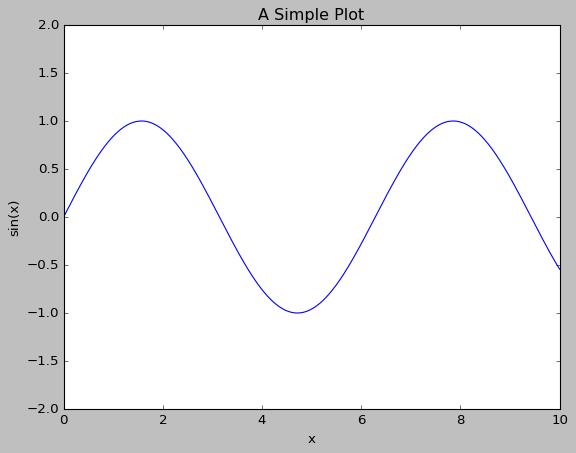

In [25]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

A more sophisticated line plot example:

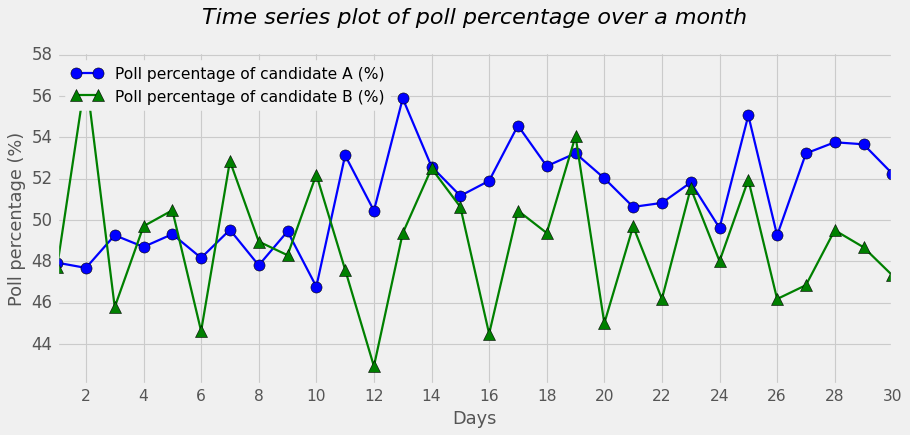

In [19]:
days = np.arange(1,31)
candidate_A = 50+days*0.07+2*np.random.randn(30)
candidate_B = 50-days*0.1+3*np.random.randn(30)

ymin = min(candidate_A.min(),candidate_B.min())
ymax = max(candidate_A.max(),candidate_B.max())
# Set style
plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,5))
plt.title("Time series plot of poll percentage over a month\n",fontsize=20, fontstyle='italic')
plt.xlabel("Days",fontsize=16)
plt.ylabel("Poll percentage (%)",fontsize=16)
plt.grid (True)
plt.ylim(ymin*0.98,ymax*1.02)
plt.xticks([i*2 for i in range(16)],fontsize=14)
plt.yticks(fontsize=15)

# Main plotting function - plot (note markersize, lw (linewidth) arguments)
plt.plot(days,candidate_A,'o-',markersize=10,c='blue',lw=2)
plt.plot(days,candidate_B,'^-',markersize=10,c='green',lw=2)

plt.legend(['Poll percentage of candidate A (%)', 'Poll percentage of candidate B (%)'],loc=2,fontsize=14)
plt.show()

## Scatter Plots
Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.
Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.

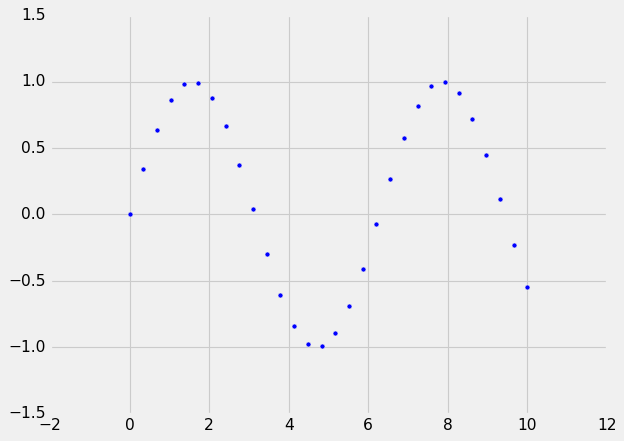

In [27]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.scatter(x, y, marker='o');

The properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes.

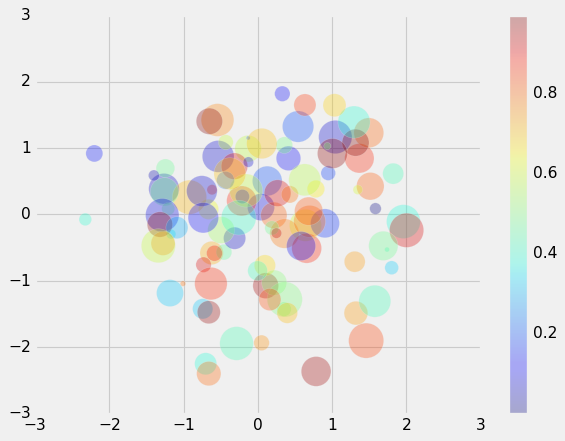

In [28]:
rng = np.random.default_rng(0)
x = rng.normal(size=100)
y = rng.normal(size=100)
colors = rng.random(100)
sizes = 1000 * rng.random(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3)
plt.colorbar();  # show color scale

Notice that the color argument is automatically mapped to a color scale (shown here by the `colorbar` command), and that the size argument is given in pixels.
In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

For example, we might use the Iris dataset from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured:

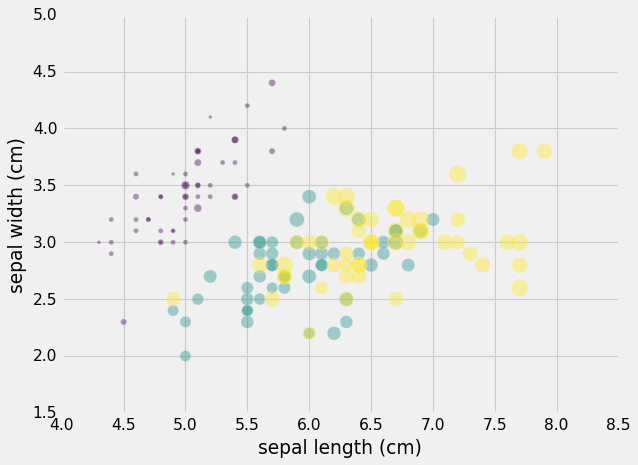

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.4,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

The plot above is OK but looks barebone. We can add few bells and whistles to it with simple code.

* Figure size
* Main title (and size the font)
* X- and Y-labels (and size the font)
* X- and Y-ticks (and size the font)
* Grid
* Text for labelling
* Legend
* Vertical (or horizontal) lines

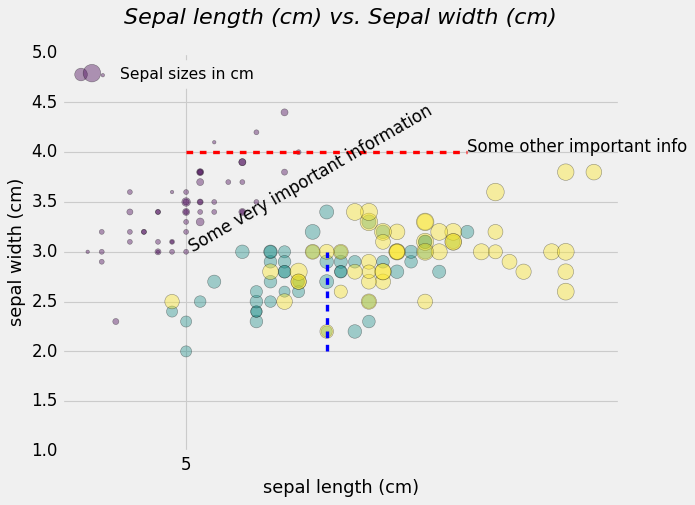

In [30]:
# Set figure size
plt.figure(figsize=(8,6))

# Add a main title
plt.title("Sepal length (cm) vs. Sepal width (cm)\n",fontsize=20, fontstyle='italic')

# X- and Y-label with fontsize
plt.xlabel(iris.feature_names[0],fontsize=16)
plt.ylabel(iris.feature_names[1],fontsize=16)

# Turn on grid
plt.grid(True)

# Set Y-axis limit
plt.ylim(1,5)

# X- and Y-axis ticks customization with fontsize and placement
plt.xticks([i*5 for i in range(12)],fontsize=15)
plt.yticks(fontsize=15)

# Main plotting function with choice of color, marker size, and marker edge color
plt.scatter(features[0], features[1], alpha=0.4,
            s=100*features[3], c=iris.target, cmap='viridis', edgecolors='k')
# Adding bit of text to the plot
plt.text(x=5,y=3,s="Some very important information",fontsize=15, 
         rotation=30, linespacing=2)
plt.text(x=7,y=4,s="Some other important info",fontsize=15)

# Adding a vertical line
plt.vlines(x=6,ymin=2,ymax=3,linestyles='dashed',color='blue',lw=3)

# Adding a horizontal line
plt.hlines(y=4,xmin=5,xmax=7,linestyles='dashed',color='red',lw=3)

# Adding a legend
plt.legend(['Sepal sizes in cm'],loc=2,fontsize=14)

# Final show method
plt.show()

## Errorbars
For any scientific measurement, accurate accounting of uncertainties is nearly as important, if not more so, as accurate reporting of the number itself.

In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

One standard way to visualize uncertainties is using an errorbar. A basic errorbar can be created with a single Matplotlib function call:

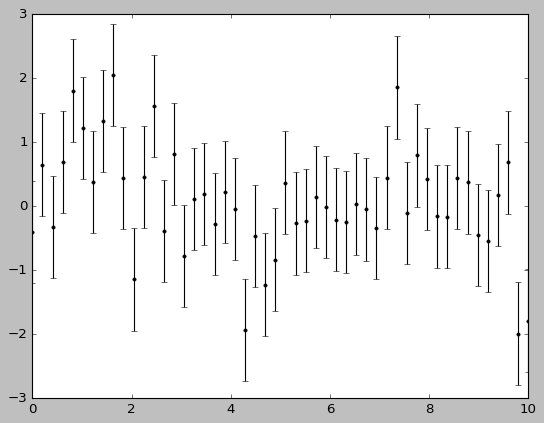

In [10]:
ax = plt.axes()
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

ax.errorbar(x, y, yerr=dy, fmt='.k');

Here the `fmt` is a format code controlling the appearance of lines and points, and it has the same syntax as the shorthand used in `plt.plot`.

In addition to these basic options, the `errorbar` function has many options to fine-tune the outputs.
Using these additional options you can easily customize the aesthetics of your errorbar plot.
I often find it helpful, especially in crowded plots, to make the errorbars lighter than the points themselves:

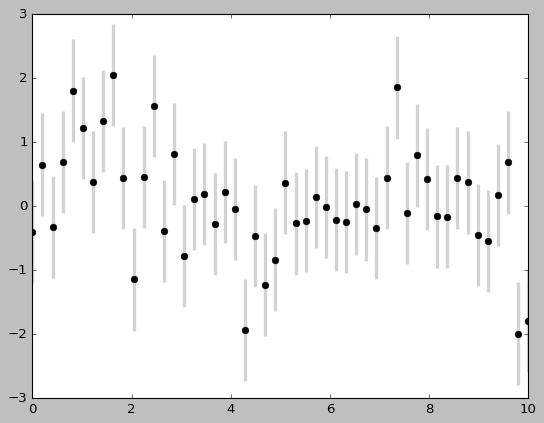

In [12]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

In addition to these options, you can also specify horizontal errorbars, one-sided errorbars, and many other variants.
For more information on the options available, refer to the docstring of `plt.errorbar`.

In some situations it is desirable to show errorbars on continuous quantities.
Matplotlib does not have a built-in convenience functions for this type of application, but it can be done with in Seaborn.

## Density and Contour Plots
Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.
There are three Matplotlib functions that can be helpful for this task: `plt.contour` for contour plots, `plt.contourf` for filled contour plots, and `plt.imshow` for showing images.

Let's demonstrate a contour plot using a function $z = f(x, y)$:

In [13]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

A contour plot can be created with the `plt.contour` function.
It takes three arguments: a grid of *x* values, a grid of *y* values, and a grid of *z* values.
The *x* and *y* values represent positions on the plot, and the *z* values will be represented by the contour levels.
Perhaps the most straightforward way to prepare such data is to use the `np.meshgrid` function, which builds two-dimensional grids from one-dimensional arrays:

In [14]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Now let's look at this with a standard line-only contour plot:

In [15]:
plt.contour(X, Y, Z, colors='black');

Notice that when a single color is used, negative values are represented by dashed lines and positive values by solid lines.
Alternatively, the lines can be color-coded by specifying a colormap with the `cmap` argument.
Here we'll also specify that we want more lines to be drawn, at 20 equally spaced intervals within the data range:

In [36]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

Here we chose the `RdGy` (short for *Red–Gray*) colormap, which is a good choice for divergent data: (i.e., data with positive and negative variation around zero).
Matplotlib has a wide range of colormaps available, which you can easily browse in IPython by doing a tab completion on the `plt.cm` module:
```
plt.cm.<TAB>
```

Our plot is looking nicer, but the spaces between the lines may be a bit distracting.
We can change this by switching to a filled contour plot using the `plt.contourf` function, which uses largely the same syntax as `plt.contour`.

Additionally, we'll add a `plt.colorbar` command, which creates an additional axis with labeled color information for the plot:

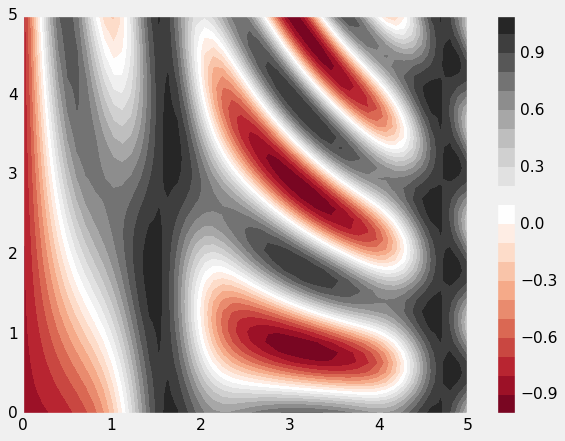

In [37]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

The colorbar makes it clear that the black regions are "peaks," while the red regions are "valleys."

One potential issue with this plot is that it is a bit splotchy: the color steps are discrete rather than continuous, which is not always what is desired.
This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level.
A better way to generate a smooth representation is to use the `plt.imshow` function, which offers the `interpolation` argument to generate a smooth two-dimensional representation of the data:

In [38]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy',
           interpolation='gaussian', aspect='equal')
plt.colorbar();

There are a few potential issues with `plt.imshow`, however:

- It doesn't accept an *x* and *y* grid, so you must manually specify the *extent* [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
- By default it follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
- It will automatically adjust the axis aspect ratio to match the input data; this can be changed with the `aspect` argument.

Finally, it can sometimes be useful to combine contour plots and image plots.
For example, here we'll use a partially transparent background image (with transparency set via the `alpha` parameter) and overplot contours with labels on the contours themselves, using the `plt.clabel` function:

In [39]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

The combination of these three functions—`plt.contour`, `plt.contourf`, and `plt.imshow`—gives nearly limitless possibilities for displaying this sort of three-dimensional data within a two-dimensional plot.

## Histograms and Binnings
A simple histogram can be a great first step in understanding a dataset.

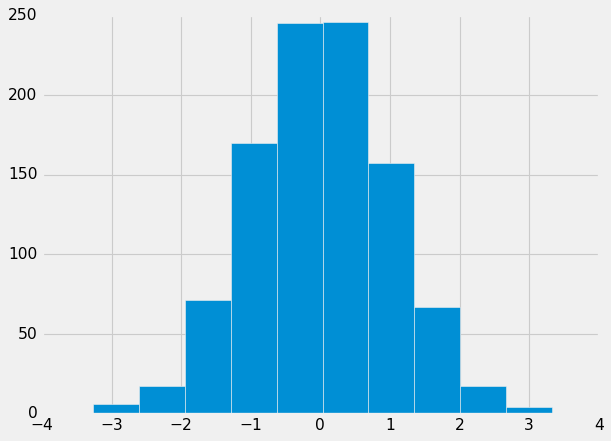

In [40]:
rng = np.random.default_rng(1701)
data = rng.normal(size=1000)
plt.hist(data);

The `hist` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram:

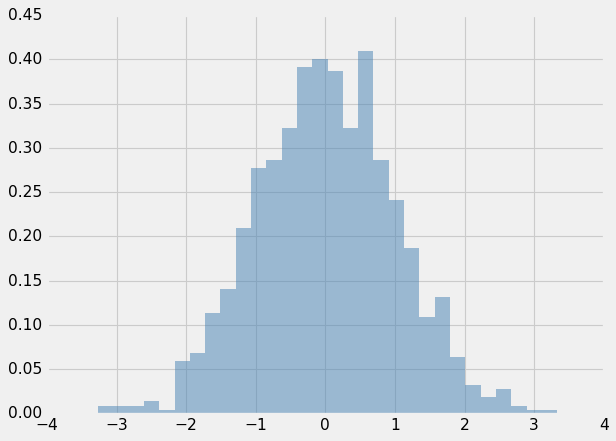

In [41]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

The `plt.hist` docstring has more information on other available customization options.
I find this combination of `histtype='stepfilled'` along with some transparency `alpha` to be helpful when comparing histograms of several distributions:

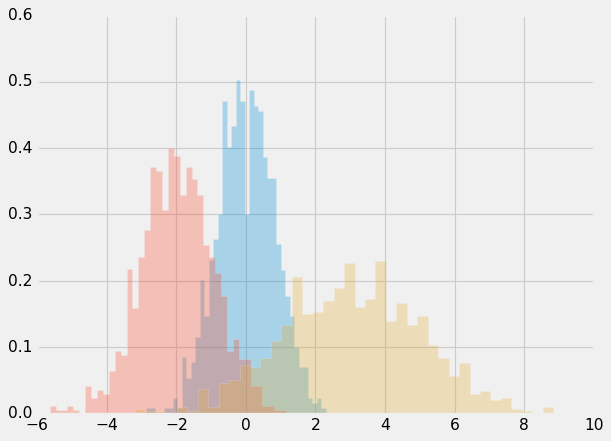

In [42]:
x1 = rng.normal(0, 0.8, 1000)
x2 = rng.normal(-2, 1, 1000)
x3 = rng.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

Just as we create histograms in one dimension by dividing the number line into bins, we can also create histograms in two dimensions by dividing points among two-dimensional bins.
We'll take a brief look at several ways to do this here.
We'll start by defining some data—an `x` and `y` array drawn from a multivariate Gaussian distribution:

In [43]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = rng.multivariate_normal(mean, cov, 10000).T

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's `plt.hist2d` function:

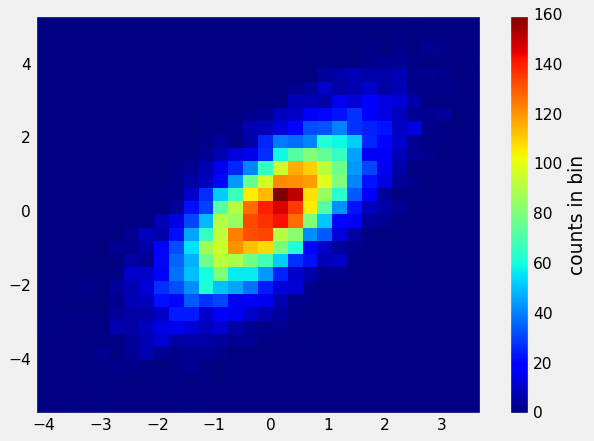

In [44]:
plt.hist2d(x, y, bins=30)
cb = plt.colorbar()
cb.set_label('counts in bin')

Just like `plt.hist`, `plt.hist2d` has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the function docstring.

The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the `plt.hexbin` routine, which represents a two-dimensional dataset binned within a grid of hexagons:

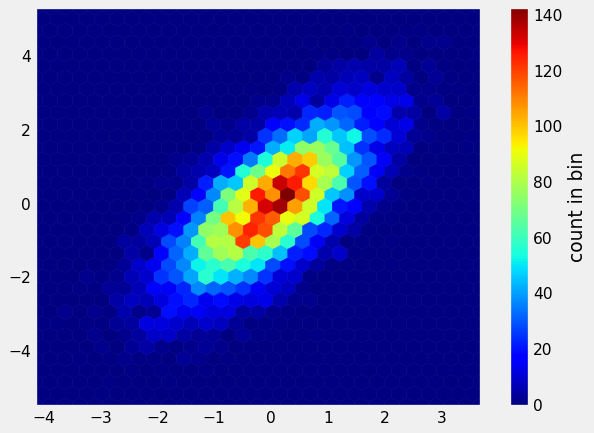

In [45]:
plt.hexbin(x, y, gridsize=30)
cb = plt.colorbar(label='count in bin')

`plt.hexbin` has a number of additional options, including the ability to specify weights for each point and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.).

## Bar charts
Another popular type of visualization is Bar chart, that is used to show categorical data. It can be presented using `plt.bar` or `ax.bar` functions

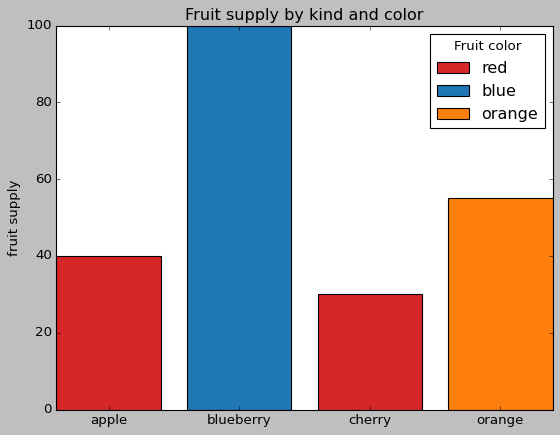

In [17]:
fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

## Boxplot
In statistics, a quartile is a type of quantile which divides the number of data points into four parts, or quarters, of more-or-less equal size. The data must be ordered from smallest to largest to compute quartiles; as such, quartiles are a form of order statistic. The three main quartiles are as follows:

* The first quartile (Q1) is defined as the middle number between the smallest number (minimum) and the median of the data set. It is also known as the lower quartile, as 25% of the data is below this point.
* The second quartile (Q2) is the median of a data set; thus 50% of the data lies below this point.
* The third quartile (Q3) is the middle value between the median and the highest value (maximum) of the data set. It is known as the upper quartile, as 75% of the data lies below this point.

Along with the minimum and maximum of the data (which are also quartiles), the three quartiles described above provide a five-number summary of the data.

In descriptive statistics, a box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.

In addition to the box on a box plot, there can be lines (which are called whiskers) extending from the box indicating variability outside the upper and lower quartiles, thus, the plot is also called the box-and-whisker plot and the box-and-whisker diagram. Outliers that differ significantly from the rest of the dataset may be plotted as individual points beyond the whiskers on the box-plot.

A boxplot is a standardized way of displaying the dataset based on the five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.

* Minimum (Q0 or 0th percentile): the lowest data point in the data set excluding any outliers
* Maximum (Q4 or 100th percentile): the highest data point in the data set excluding any outliers
* Median (Q2 or 50th percentile): the middle value in the data set
* First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), it is the median of the lower half of the dataset.
* Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), it is the median of the upper half of the dataset.

In addition to the minimum and maximum values used to construct a box-plot, another important element that can also be employed to obtain a box-plot is the Interquartile range (IQR): the distance between the upper and lower quartiles.

<img src="images/box.png" style="background:none; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

In [20]:
plt.style.use('ggplot')
# Note how to convert default numerical x-axis ticks to the list of string by passing two lists 
plt.boxplot(x=[candidate_A,candidate_B],showmeans=True)
plt.grid(True)
plt.xticks([1,2],['Candidate A','Candidate B'])
plt.yticks(fontsize=15)
plt.show()

## Subplots
Sometimes it is helpful to compare different views of data side by side.
To this end, Matplotlib has the concept of *subplots*: groups of smaller axes that can exist together within a single figure.
These subplots might be insets, grids of plots, or other more complicated layouts.

The most basic method of creating an axes is to use the `plt.axes` function.
As we've seen previously, by default this creates a standard axes object that fills the entire figure.
`plt.axes` also takes an optional argument that is a list of four numbers in the figure coordinate system (`[left, bottom, width, height]`), which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

In [48]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

The equivalent of this command within the object-oriented interface is `fig.add_axes`. Let's use this to create two vertically stacked axes:

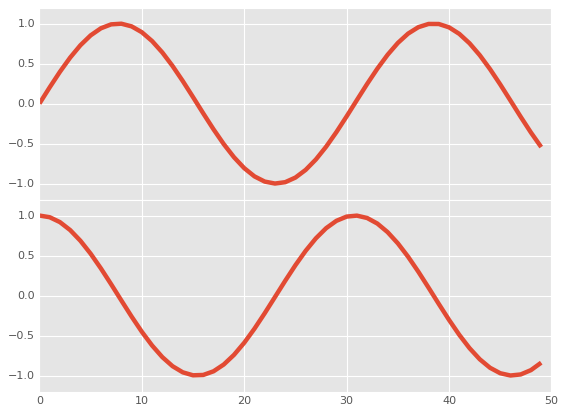

In [49]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

We now have two axes (the top with no tick labels) that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).

Aligned columns or rows of subplots are a common enough need that Matplotlib has several convenience routines that make them easy to create.
The lowest level of these is `plt.subplot`, which creates a single subplot within a grid.
As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

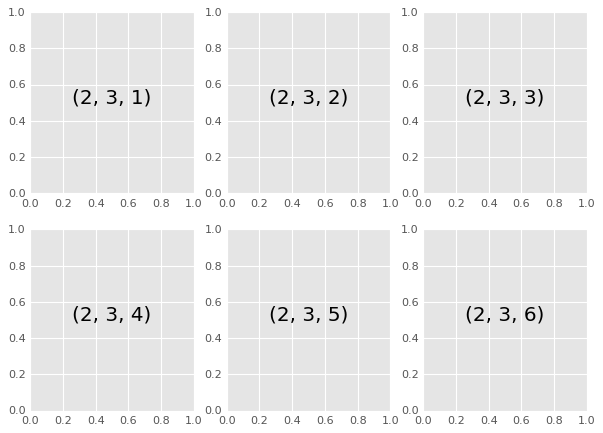

In [50]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

The command `plt.subplots_adjust` can be used to adjust the spacing between these plots.
The following code uses the equivalent object-oriented command, `fig.add_subplot`:

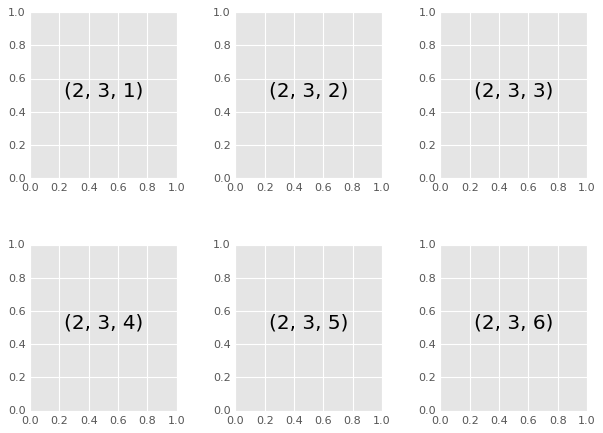

In [51]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

Here we've used the `hspace` and `wspace` arguments of `plt.subplots_adjust`, which specify the spacing along the height and width of the figure, in units of the subplot size (in this case, the space is 40% of the subplot width and height).

The approach just described quickly becomes tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots.
For this purpose, `plt.subplots` is the easier tool to use (note the `s` at the end of `subplots`). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array.
The arguments are the number of rows and number of columns, along with optional keywords `sharex` and `sharey`, which allow you to specify the relationships between different axes.

Let's create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

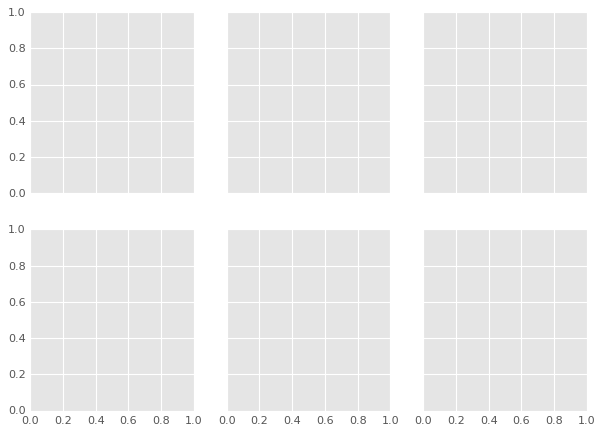

In [52]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

By specifying `sharex` and `sharey`, we've automatically removed inner labels on the grid to make the plot cleaner.
The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation:

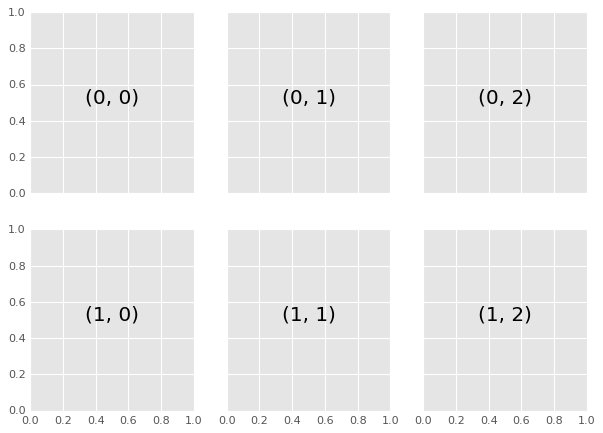

In [53]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

In comparison to `plt.subplot`, `plt.subplots` is more consistent with Python's conventional zero-based indexing, whereas `plt.subplot` uses MATLAB-style one-based indexing.

More types of plots can be found in [documentation](https://matplotlib.org/stable/plot_types/index.html)